### Set-up

In [1]:
#Train on GPU
import torch
print("PyTorch version:", torch.__version__)

if torch.cuda.is_available():
    device = torch.device("cuda")
    print("There are", torch.cuda.device_count(), "GPU(s) available.")
    print("Device name:", torch.cuda.get_device_name(0))
else:
    print("No GPU available, using CPU instead.")
    device = torch.device("cpu")

PyTorch version: 2.0.0+cu118
There are 1 GPU(s) available.
Device name: Tesla T4


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
%cd /content/drive/My Drive/yolo

/content/drive/My Drive/yolo


In [ ]:
#Install and import CleanML for Logging and Tracking
%pip install -q clearml
import clearml; clearml.browser_login()

In [6]:
%cd yolov5

/content/drive/My Drive/yolo/yolov5


In [ ]:
%pip install -qr requirements.txt 

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.5 MB/s eta 0:00:00


In [ ]:
import torch
import utils
display = utils.notebook_init()  # checks

YOLOv5 🚀 2023-5-1 Python-3.10.11 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)


Setup complete ✅ (2 CPUs, 12.7 GB RAM, 23.4/78.2 GB disk)


In [ ]:
%pwd

'/content/drive/My Drive/yolo/yolov5'

In [ ]:
#Configuration for CleanML
%env CLEARML_WEB_HOST=https://app.clear.ml
%env CLEARML_API_HOST=https://api.clear.ml
%env CLEARML_FILES_HOST=https://files.clear.ml
%env CLEARML_API_ACCESS_KEY=#Hidden
%env CLEARML_API_SECRET_KEY=#Hidden

### Model — v4

In this attempt, I try to increase learning rate while staying with the previous parameteres and hyperparameteres. At the end, I also decide to try 896 image size because the memory allows for it.

**Hyperparameters used** (modifying the hyp.scratch-low.yaml):


lr0: 0.02  # initial learning rate (SGD=1E-2, Adam=1E-3) 

lrf: 0.03  # final OneCycleLR learning rate (lr0 * lrf)

momentum: 0.937  # SGD momentum/Adam beta1

weight_decay: 0.0005  # optimizer weight decay 5e-4

warmup_epochs: 3.0  # warmup epochs (fractions ok)

warmup_momentum: 0.8  # warmup initial momentum

warmup_bias_lr: 0.1  # warmup initial bias lr

box: 0.05  # box loss gain

cls: 0.55  # cls loss gain

cls_pw: 1.0  # cls BCELoss positive_weight

obj: 1.0  # obj loss gain (scale with pixels)

obj_pw: 1.0  # obj BCELoss positive_weight

iou_t: 0.20  # IoU training threshold

anchor_t: 4.0  # anchor-multiple threshold

fl_gamma: 0.0  # focal loss gamma (efficientDet default gamma=1.5)

hsv_h: 0.015  # image HSV-Hue augmentation (fraction)

hsv_s: 0.7  # image HSV-Saturation augmentation (fraction)

hsv_v: 0.4  # image HSV-Value augmentation (fraction)

degrees: 0.0  # image rotation (+/- deg)

translate: 0.1  # image translation (+/- fraction)

scale: 0.5  # image scale (+/- gain)

shear: 0.1  # image shear (+/- deg)

perspective: 0.0  # image perspective (+/- fraction), range 0-0.001

flipud: 0.0  # image flip up-down (probability)

fliplr: 0.5  # image flip left-right (probability)

mosaic: 1.0  # image mosaic (probability)

mixup: 0.0  # image mixup (probability)

copy_paste: 0.0  # segment copy-paste (probability)


In [ ]:
from clearml import Task
task = Task.init(project_name="YOLO_SL_Colab", task_name="yolo_train_v7")

ClearML Task: created new task id=6cd87545c5ab42ae8c8dec079e8f509f


ClearML results page: https://app.clear.ml/projects/dc92712157834714a718b2a99d98c945/experiments/6cd87545c5ab42ae8c8dec079e8f509f/output/log


In [ ]:
!python train.py --img 896 --batch 16 --epochs 220 --data train.yaml --cfg "./models/yolov5m.yaml" --weights '' --name "v5"

2023-05-01 22:37:29,973 - clearml.Task - INFO - Storing jupyter notebook directly as code
train: weights=, cfg=./models/yolov5m.yaml, data=train.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=220, batch_size=16, imgsz=896, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=v5, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: ⚠️ YOLOv5 is out of date by 2 commits. Use 'git pull' or 'git clone https://github.com/ultralytics/yolov5' to update.
requirements: /content/drive/MyDrive/yolo/requirements.txt not found, check failed.
YOLOv5 🚀 v7.0-158-g8211a03 Python-3.10.11 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)

hyperparameter

In [ ]:
task.close()

In [7]:
!python val.py --data train.yaml --weights "runs/train/v56/weights/best.pt" --img 896 --conf 0.25 --iou 0.45

val: data=train.yaml, weights=['runs/train/v56/weights/best.pt'], batch_size=32, imgsz=896, conf_thres=0.25, iou_thres=0.45, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False
requirements: /content/drive/My Drive/yolo/requirements.txt not found, check failed.
WARNING ⚠️ confidence threshold 0.25 > 0.001 produces invalid results
fatal: cannot change to '/content/drive/My': No such file or directory
YOLOv5 🚀 2023-5-1 Python-3.10.11 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
YOLOv5m summary: 212 layers, 20856975 parameters, 0 gradients
100% 755k/755k [00:00<00:00, 17.4MB/s]
val: Scanning /content/drive/My Drive/yolo/val/labels.cache... 13 images, 0 backgrounds, 0 corrupt: 100% 13/13 [00:00<?, ?it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 1

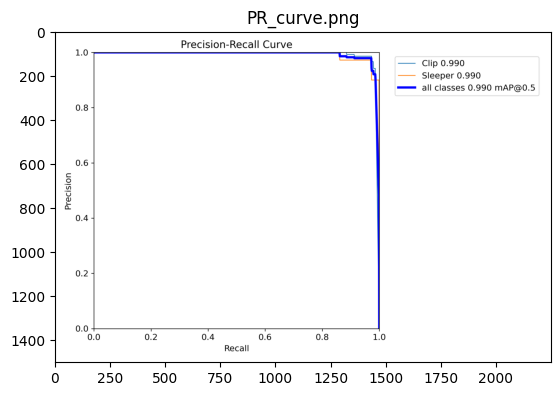

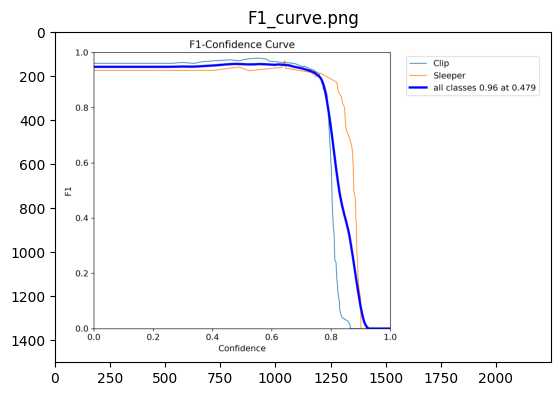

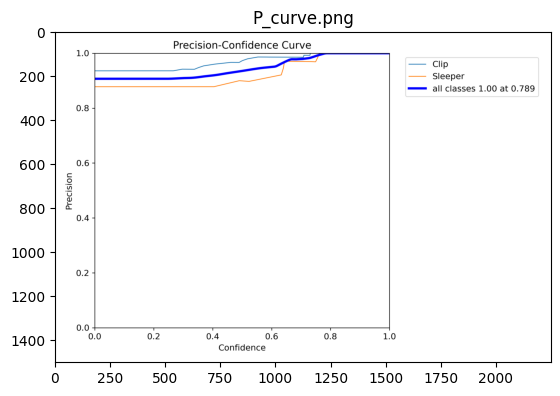

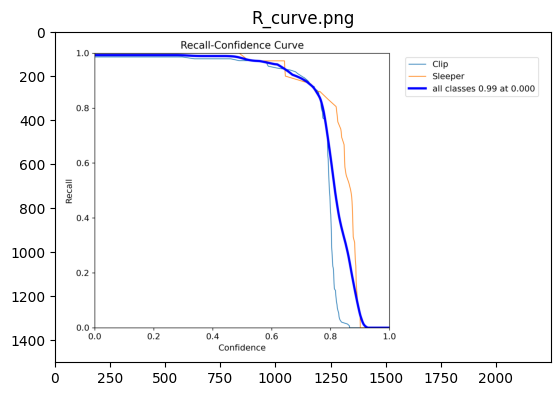

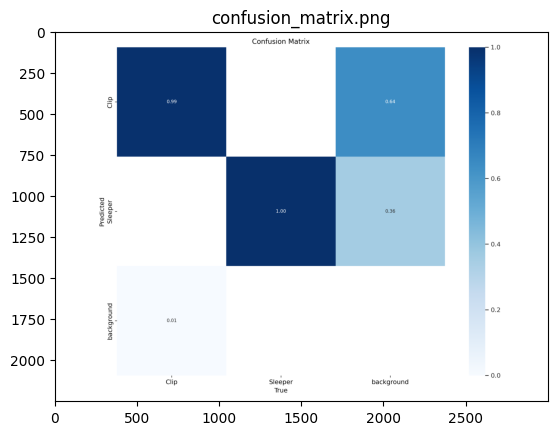

In [9]:
import os
import matplotlib.pyplot as plt
# Define the directory where the images are stored
directory = "runs/val/exp4"

# Get a list of all the image files in the directory
image_files = [f for f in os.listdir(directory) if os.path.isfile(os.path.join(directory, f)) ]

# Loop through the image files and display each one using Matplotlib
for filename in image_files:
    filepath = os.path.join(directory, filename)
    img = plt.imread(filepath)
    plt.imshow(img)
    plt.title(filename)
    plt.show()

### Interpretation of the results — v4

Bigger image size allows to further increase the performance of mAP50-95 which was the main goal. Recall and Precision are not perfect as it was in the v3 but probably in a slightly bigger amount of epochs they would increase as well. —  In comparison to the v1:

(v1 vs v4) <br>
Precision: 0.89 vs 0.94 <br>
Recall: 0.91 vs 0.98 <br>
mAP: 0.94 vs 0.99 <br>
**mAP_50_95: 0.58 vs 0.721**<br>

However, mAP50-95 still could be improved. Also note the improved performance of Sleepers — in comparison to the first model, the improvement is significant. (0.559 of mAP50-95 in v1 vs 0.805 in v4). I also feel that by changing parameteres we downgraded the performance of Clips.

From the figures below we can also detect that changing parameteres made the model a tiny bit more noisy* but it was the trade-off with performance and accuracy.

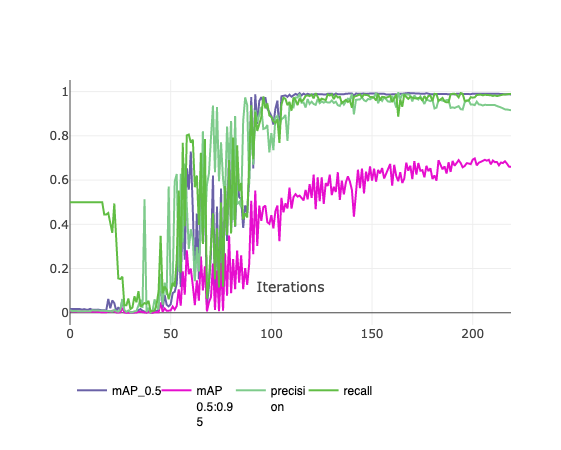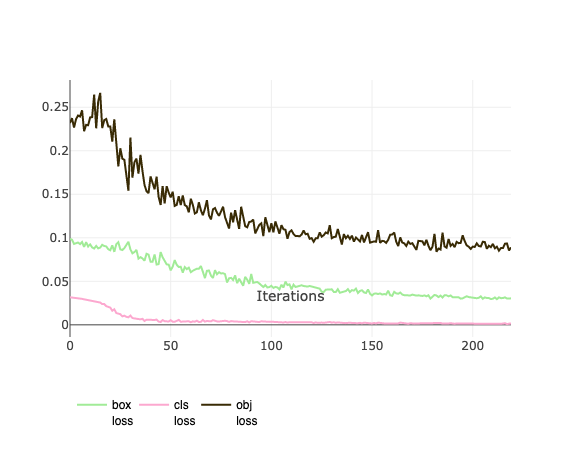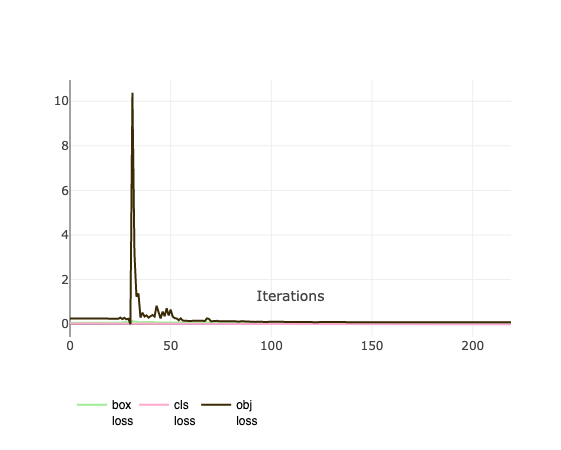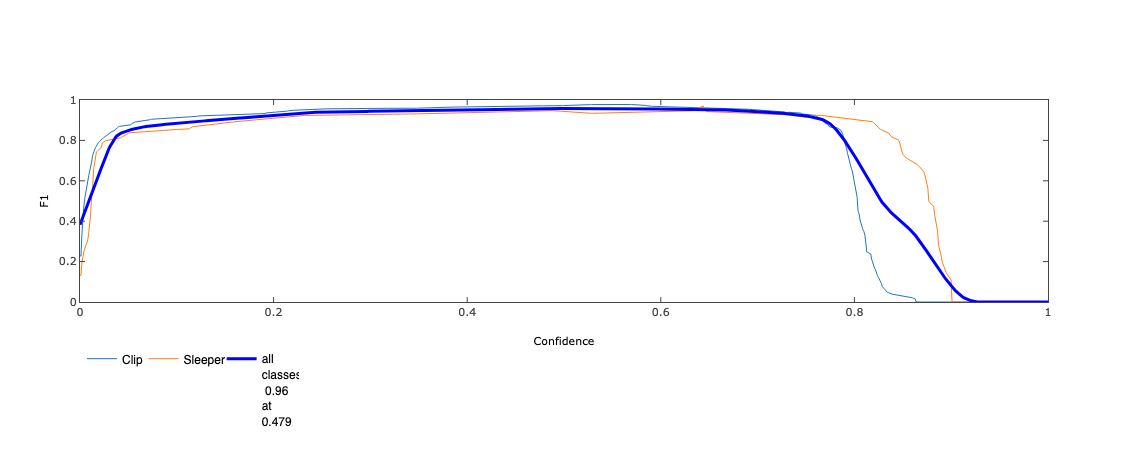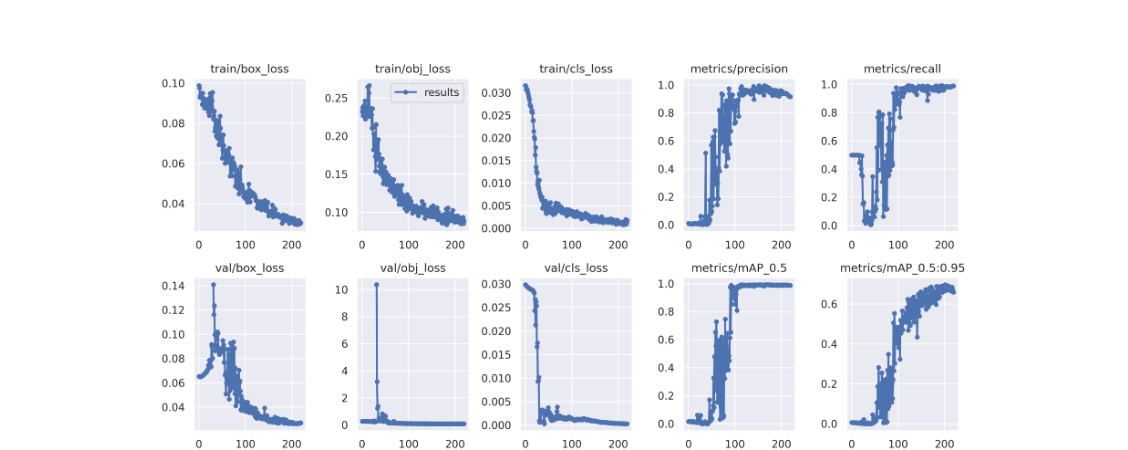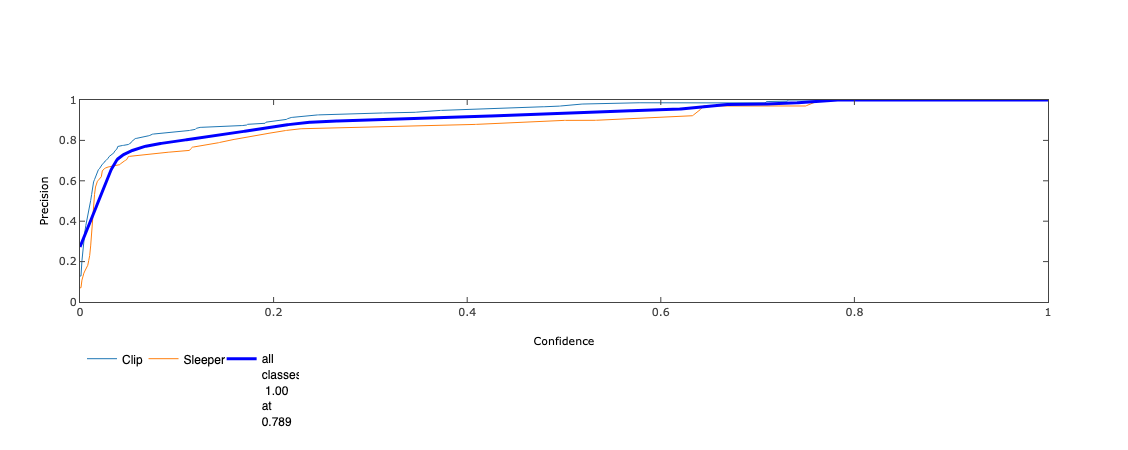

*I also tried further increasing hyperparameters — more aggressive learning rate but also augmentation hyperparameters. However, the results was not going into good direction — too much instability. (Figures below showcase this for the first 50 epochs). That is why, I dropped and decided not to present it.

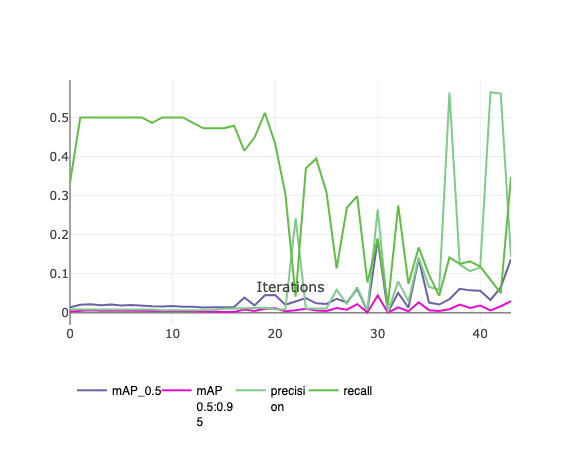

### Future Work

Three main aspects can be implemented to further increase the results:
1. Further change in hyperparameters — find a balance between stability and performance.
2. Augment Data
3. Change architecture to yolov5l